In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

In [325]:
#Reading the data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")


In [326]:
train.head()

,id,uid,Location,Gender,Age,Height,Weight,Hash,FHO,CHCF,...,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
0,14633,Q68lpI2C3l8tw2QW,SunderNagar,Male,23.000000,1.700000,83.0,##########,1.0,0,...,3.0,Sometimes,0,3.000000,0,3.000000,1.00000,0,Walking,Overweight_Level_II
1,19443,eUsHPeGtQ1HwdF2p,Punjabi Bagh,Female,23.000000,1.600000,84.0,##########,1.0,1,...,3.0,Sometimes,0,3.000000,0,3.000000,0.00000,0,Public_Transportation,Obesity_Type_I
2,10216,swftYdUOhKVvaKI8,VikasPuri,Female,28.825223,1.549748,65.220249,##########,1.0,0,...,3.0,Sometimes,0,1.984323,0,1.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
3,2016,U3xIAw1dohYe23cM,Vasant Vihar,Male,25.341399,1.787195,115.428276,##########,1.0,1,...,3.0,Sometimes,0,2.535127,0,0.849811,1.89933,Sometimes,Public_Transportation,Obesity_Type_II
4,9674,MrZ5Tzad8D250EPc,Vasant Vihar,Male,22.000000,1.750000,58.0,##########,0.0,1,...,4.0,Sometimes,0,2.000000,0,2.000000,0.00000,0,Public_Transportation,Insufficient_Weight


In [327]:
test.head()

,id,uid,Location,Gender,Age,Height,Weight,Hash,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode
0,10317,7w53s2NgM2arZAvM,Punjabi Bagh,Female,25.951979,1.669039,104.954291,##########,1.0,1,3.000000,3.0,Sometimes,0,2.092326,0,0.043101,0.540812,Sometimes,Public_Transportation
1,4074,kTLn00K8evgYXWxR,Hauz Khas,Female,40.993179,1.567973,81.022119,##########,1.0,1,2.921576,3.0,Sometimes,0,1.005727,0,1.034031,0.000000,0,Automobile
2,9060,81HX39uej0BR1xIl,Vasant Vihar,Male,21.000000,1.740000,76.0,##########,0.0,1,3.000000,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
3,11286,DA9eqs9fs7wJUIet,Hauz Khas,Male,33.000000,1.680000,83.0,##########,1.0,1,2.000000,1.0,Sometimes,0,2.000000,0,1.000000,0.000000,Sometimes,Automobile
4,8254,SJ1Z7TBmojAPlJXd,SunderNagar,Female,35.194089,1.673482,73.193589,##########,1.0,0,3.000000,3.0,Sometimes,0,1.572371,0,1.806740,0.000000,Sometimes,Automobile


In [328]:
# Returns the array dimensions
train.shape

#Check if there are any missing values
#sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='plasma')

(12454, 21)

In [329]:
test.shape

(8304, 20)

clearly we can see that from the datset that columns id,uid and hash are not useful for prediction of obesity levels.hence we need to drop these columns.

In [330]:
#dropping non required columns from train and test datframes
train = train.drop([ 'uid','Hash'], axis=1)
test = test.drop(['uid','Hash'], axis=1)
train

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
0,14633,SunderNagar,Male,23.000000,1.700000,83.0,1.0,0,2.000000,3.0,Sometimes,0,3.000000,0,3.000000,1.000000,0,Walking,Overweight_Level_II
1,19443,Punjabi Bagh,Female,23.000000,1.600000,84.0,1.0,1,2.000000,3.0,Sometimes,0,3.000000,0,3.000000,0.000000,0,Public_Transportation,Obesity_Type_I
2,10216,VikasPuri,Female,28.825223,1.549748,65.220249,1.0,0,2.000000,3.0,Sometimes,0,1.984323,0,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
3,2016,Vasant Vihar,Male,25.341399,1.787195,115.428276,1.0,1,2.967300,3.0,Sometimes,0,2.535127,0,0.849811,1.899330,Sometimes,Public_Transportation,Obesity_Type_II
4,9674,Vasant Vihar,Male,22.000000,1.750000,58.0,0.0,1,2.000000,4.0,Sometimes,0,2.000000,0,2.000000,0.000000,0,Public_Transportation,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,11284,SunderNagar,Female,26.000000,1.639251,111.946321,1.0,1,3.000000,3.0,Sometimes,0,2.640539,0,0.000000,0.456462,Sometimes,Public_Transportation,Obesity_Type_III
12450,11964,VikasPuri,Male,17.000000,1.700000,NaN,1.0,1,2.000000,3.0,Sometimes,0,2.000000,0,2.000000,2.000000,Sometimes,Automobile,Obesity_Type_I
12451,5390,Hauz Khas,Male,23.000000,1.900000,95.0,1.0,1,2.000000,3.0,Always,0,3.000000,0,3.000000,1.000000,Frequently,Walking,Obesity_Type_I
12452,860,Punjabi Bagh,Male,24.000000,1.790000,84.0,1.0,0,2.000000,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II


In [331]:
train.duplicated().sum()

0

In [332]:
test

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode
0,10317,Punjabi Bagh,Female,25.951979,1.669039,104.954291,1.0,1,3.000000,3.0,Sometimes,0,2.092326,0,0.043101,0.540812,Sometimes,Public_Transportation
1,4074,Hauz Khas,Female,40.993179,1.567973,81.022119,1.0,1,2.921576,3.0,Sometimes,0,1.005727,0,1.034031,0.000000,0,Automobile
2,9060,Vasant Vihar,Male,21.000000,1.740000,76.0,0.0,1,3.000000,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
3,11286,Hauz Khas,Male,33.000000,1.680000,83.0,1.0,1,2.000000,1.0,Sometimes,0,2.000000,0,1.000000,0.000000,Sometimes,Automobile
4,8254,SunderNagar,Female,35.194089,1.673482,73.193589,1.0,0,3.000000,3.0,Sometimes,0,1.572371,0,1.806740,0.000000,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,5294,Punjabi Bagh,Female,20.000000,1.600000,42.0,0.0,1,3.000000,1.0,Frequently,0,1.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
8300,4473,Vasant Vihar,Female,21.420537,1.739457,133.735889,1.0,1,3.000000,3.0,Sometimes,0,2.310921,0,1.618512,0.711331,Sometimes,Public_Transportation
8301,20603,Punjabi Bagh,Female,18.000000,1.600000,60.0,0.0,1,3.000000,3.0,Always,0,2.000000,0,1.000000,0.000000,0,Public_Transportation
8302,10907,Vasant Vihar,Female,18.014333,1.624099,45.0,0.0,1,3.000000,3.0,Sometimes,0,2.000000,1,1.637368,0.105936,Sometimes,Public_Transportation


In [333]:
# checking shape of both the datframes
print(train.shape)
print(test.shape)

(12454, 19)
(8304, 18)


<Axes: >

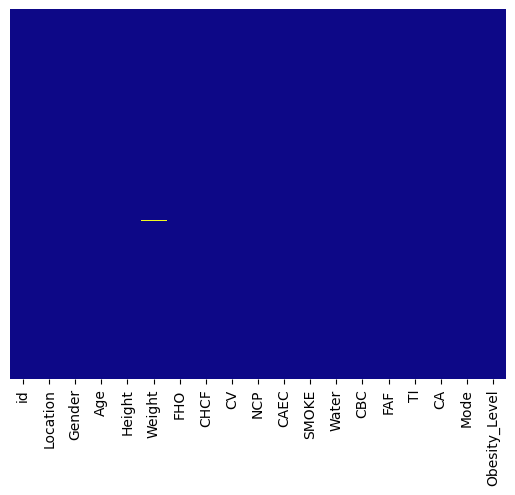

In [334]:
#Check if there are any missing values
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [335]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12454 non-null  int64  
 1   Location       12454 non-null  object 
 2   Gender         12454 non-null  object 
 3   Age            12454 non-null  float64
 4   Height         12422 non-null  float64
 5   Weight         12428 non-null  object 
 6   FHO            12442 non-null  float64
 7   CHCF           12454 non-null  int64  
 8   CV             12454 non-null  float64
 9   NCP            12454 non-null  float64
 10  CAEC           12440 non-null  object 
 11  SMOKE          12454 non-null  int64  
 12  Water          12454 non-null  float64
 13  CBC            12454 non-null  int64  
 14  FAF            12454 non-null  float64
 15  TI             12439 non-null  float64
 16  CA             12454 non-null  object 
 17  Mode           12454 non-null  object 
 18  Obesit

In train datset there are missing columns in height, weight,FHO, CAEC, TI columns so we need to either fill the null values drop these rows from the datframe

<Axes: >

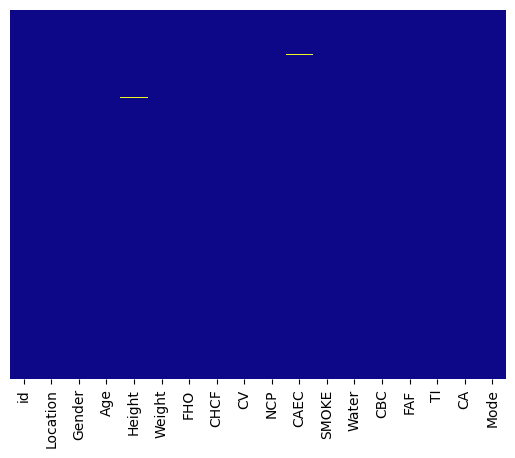

In [336]:
#Check if there are any missing values
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='plasma')

In [337]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8304 entries, 0 to 8303
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8304 non-null   int64  
 1   Location  8304 non-null   object 
 2   Gender    8304 non-null   object 
 3   Age       8304 non-null   float64
 4   Height    8288 non-null   float64
 5   Weight    8286 non-null   object 
 6   FHO       8296 non-null   float64
 7   CHCF      8304 non-null   int64  
 8   CV        8304 non-null   float64
 9   NCP       8304 non-null   float64
 10  CAEC      8298 non-null   object 
 11  SMOKE     8304 non-null   int64  
 12  Water     8304 non-null   float64
 13  CBC       8304 non-null   int64  
 14  FAF       8304 non-null   float64
 15  TI        8299 non-null   float64
 16  CA        8304 non-null   object 
 17  Mode      8304 non-null   object 
dtypes: float64(8), int64(4), object(6)
memory usage: 1.1+ MB


In test datset there are missing columns in height, weight,FHO, CAEC, TI columns so we need to either fill the null values drop these rows from the datframe

In [338]:
# Replace non-numeric values in 'Weight' column with NaN
train['Weight'] = pd.to_numeric(train['Weight'], errors='coerce')

# Calculate the mean weight (excluding NaN)
mean_weight = train['Weight'].mean()

# Convert 'Weight' column to float
train['Weight'] = train['Weight'].astype(float)

# Replace NaN and non-numeric values with the mean weight
train['Weight'].fillna(mean_weight, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12454 non-null  int64  
 1   Location       12454 non-null  object 
 2   Gender         12454 non-null  object 
 3   Age            12454 non-null  float64
 4   Height         12422 non-null  float64
 5   Weight         12454 non-null  float64
 6   FHO            12442 non-null  float64
 7   CHCF           12454 non-null  int64  
 8   CV             12454 non-null  float64
 9   NCP            12454 non-null  float64
 10  CAEC           12440 non-null  object 
 11  SMOKE          12454 non-null  int64  
 12  Water          12454 non-null  float64
 13  CBC            12454 non-null  int64  
 14  FAF            12454 non-null  float64
 15  TI             12439 non-null  float64
 16  CA             12454 non-null  object 
 17  Mode           12454 non-null  object 
 18  Obesit

In [339]:
mean_height = train['Height'].mean()
train['Height'].fillna(mean_height, inplace=True)

In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12454 non-null  int64  
 1   Location       12454 non-null  object 
 2   Gender         12454 non-null  object 
 3   Age            12454 non-null  float64
 4   Height         12454 non-null  float64
 5   Weight         12454 non-null  float64
 6   FHO            12442 non-null  float64
 7   CHCF           12454 non-null  int64  
 8   CV             12454 non-null  float64
 9   NCP            12454 non-null  float64
 10  CAEC           12440 non-null  object 
 11  SMOKE          12454 non-null  int64  
 12  Water          12454 non-null  float64
 13  CBC            12454 non-null  int64  
 14  FAF            12454 non-null  float64
 15  TI             12439 non-null  float64
 16  CA             12454 non-null  object 
 17  Mode           12454 non-null  object 
 18  Obesit

In [341]:
mode_FHO = train['FHO'].mode()[0]
train['FHO'].fillna(mode_FHO, inplace=True)

In [342]:
train['CAEC'].value_counts()

CAEC
Sometimes     10451
Frequently     1549
Always          278
0               162
Name: count, dtype: int64

In [343]:
train['CAEC'] = train['CAEC'].replace('0', 'Never')

In [344]:
train['CAEC'].value_counts()

CAEC
Sometimes     10451
Frequently     1549
Always          278
Never           162
Name: count, dtype: int64

In [345]:
# Find the mode (most frequently occurring value) in 'CAEC' column
mode_value = train['CAEC'].mode()[0]

# Replace null values in 'CAEC' column with the mode value
train['CAEC'].fillna(mode_value, inplace=True)

In [346]:
train['CA'].value_counts()

CA
Sometimes     9056
0             3094
Frequently     304
Name: count, dtype: int64

In [347]:
train['CA'] = train['CA'].replace('0', 'Never')

In [348]:
mean_TI = train['TI'].mean()
train['TI'].fillna(mean_TI, inplace=True)

In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12454 non-null  int64  
 1   Location       12454 non-null  object 
 2   Gender         12454 non-null  object 
 3   Age            12454 non-null  float64
 4   Height         12454 non-null  float64
 5   Weight         12454 non-null  float64
 6   FHO            12454 non-null  float64
 7   CHCF           12454 non-null  int64  
 8   CV             12454 non-null  float64
 9   NCP            12454 non-null  float64
 10  CAEC           12454 non-null  object 
 11  SMOKE          12454 non-null  int64  
 12  Water          12454 non-null  float64
 13  CBC            12454 non-null  int64  
 14  FAF            12454 non-null  float64
 15  TI             12454 non-null  float64
 16  CA             12454 non-null  object 
 17  Mode           12454 non-null  object 
 18  Obesit

In [350]:
# Replace non-numeric values in 'Weight' column with NaN
test['Weight'] = pd.to_numeric(test['Weight'], errors='coerce')

# Calculate the mean weight (excluding NaN)
mean_weight = test['Weight'].mean()

# Convert 'Weight' column to float
test['Weight'] = test['Weight'].astype(float)

# Replace NaN and non-numeric values with the mean weight
test['Weight'].fillna(mean_weight, inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8304 entries, 0 to 8303
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8304 non-null   int64  
 1   Location  8304 non-null   object 
 2   Gender    8304 non-null   object 
 3   Age       8304 non-null   float64
 4   Height    8288 non-null   float64
 5   Weight    8304 non-null   float64
 6   FHO       8296 non-null   float64
 7   CHCF      8304 non-null   int64  
 8   CV        8304 non-null   float64
 9   NCP       8304 non-null   float64
 10  CAEC      8298 non-null   object 
 11  SMOKE     8304 non-null   int64  
 12  Water     8304 non-null   float64
 13  CBC       8304 non-null   int64  
 14  FAF       8304 non-null   float64
 15  TI        8299 non-null   float64
 16  CA        8304 non-null   object 
 17  Mode      8304 non-null   object 
dtypes: float64(9), int64(4), object(5)
memory usage: 1.1+ MB


In [351]:
mean_height = test['Height'].mean()
test['Height'].fillna(mean_height, inplace=True)

In [352]:
mode_FHO = test['FHO'].mode()[0]
test['FHO'].fillna(mode_FHO, inplace=True)

In [353]:
test['CAEC'] = test['CAEC'].replace('0', 'Never')
# Find the mode (most frequently occurring value) in 'CAEC' column
mode_value = test['CAEC'].mode()[0]

# Replace null values in 'CAEC' column with the mode value
test['CAEC'].fillna(mode_value, inplace=True)

In [354]:
test['CA'].value_counts()

CA
Sometimes     6010
0             2069
Frequently     225
Name: count, dtype: int64

In [355]:
test['CA'] = test['CA'].replace('0', 'Never')
mean_TI = test['TI'].mean()
test['TI'].fillna(mean_TI, inplace=True)

In [356]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12454 non-null  int64  
 1   Location       12454 non-null  object 
 2   Gender         12454 non-null  object 
 3   Age            12454 non-null  float64
 4   Height         12454 non-null  float64
 5   Weight         12454 non-null  float64
 6   FHO            12454 non-null  float64
 7   CHCF           12454 non-null  int64  
 8   CV             12454 non-null  float64
 9   NCP            12454 non-null  float64
 10  CAEC           12454 non-null  object 
 11  SMOKE          12454 non-null  int64  
 12  Water          12454 non-null  float64
 13  CBC            12454 non-null  int64  
 14  FAF            12454 non-null  float64
 15  TI             12454 non-null  float64
 16  CA             12454 non-null  object 
 17  Mode           12454 non-null  object 
 18  Obesit

In [357]:
train.isnull().sum()

id               0
Location         0
Gender           0
Age              0
Height           0
Weight           0
FHO              0
CHCF             0
CV               0
NCP              0
CAEC             0
SMOKE            0
Water            0
CBC              0
FAF              0
TI               0
CA               0
Mode             0
Obesity_Level    0
dtype: int64

In [358]:
test.isnull().sum()

id          0
Location    0
Gender      0
Age         0
Height      0
Weight      0
FHO         0
CHCF        0
CV          0
NCP         0
CAEC        0
SMOKE       0
Water       0
CBC         0
FAF         0
TI          0
CA          0
Mode        0
dtype: int64

In [359]:
train.describe()

,id,Age,Height,Weight,FHO,CHCF,CV,NCP,SMOKE,Water,CBC,FAF,TI
count,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000
mean,10375.888630,23.975410,1.703443,87.937533,0.819335,0.915690,2.444949,2.760765,0.011884,2.030533,0.033804,0.984260,0.619032
std,6008.545812,6.592500,0.134490,26.368597,0.384756,0.277864,0.532390,0.720427,0.108367,0.626635,0.180733,0.838895,0.602692
min,1.000000,14.000000,1.450000,39.101805,0.000000,0.000000,1.000000,-9.000000,0.000000,-10.000000,0.000000,0.000000,0.000000
25%,5159.500000,19.979810,1.632896,66.401407,1.000000,1.000000,2.000000,3.000000,0.000000,1.796257,0.000000,0.011487,0.000000
50%,10424.500000,22.815416,1.700000,84.505505,1.000000,1.000000,2.392665,3.000000,0.000000,2.000000,0.000000,1.000000,0.581190
75%,15594.750000,26.000000,1.763321,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.550672,0.000000,1.596576,1.000000
max,20757.000000,133.000000,6.168077,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [360]:
train.loc[train['NCP'] < 0, 'NCP'] *= -1

In [361]:
test.loc[test['NCP'] < 0, 'NCP'] *= -1

In [362]:
train.loc[train['Water'] < 0, 'Water'] *= -1

In [363]:
test.loc[test['Water'] < 0, 'Water'] *= -1

In [364]:
train.describe()

,id,Age,Height,Weight,FHO,CHCF,CV,NCP,SMOKE,Water,CBC,FAF,TI
count,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000,12454.000000
mean,10375.888630,23.975410,1.703443,87.937533,0.819335,0.915690,2.444949,2.764298,0.011884,2.033906,0.033804,0.984260,0.619032
std,6008.545812,6.592500,0.134490,26.368597,0.384756,0.277864,0.532390,0.706748,0.108367,0.615600,0.180733,0.838895,0.602692
min,1.000000,14.000000,1.450000,39.101805,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5159.500000,19.979810,1.632896,66.401407,1.000000,1.000000,2.000000,3.000000,0.000000,1.796257,0.000000,0.011487,0.000000
50%,10424.500000,22.815416,1.700000,84.505505,1.000000,1.000000,2.392665,3.000000,0.000000,2.000000,0.000000,1.000000,0.581190
75%,15594.750000,26.000000,1.763321,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.550672,0.000000,1.596576,1.000000
max,20757.000000,133.000000,6.168077,165.057269,1.000000,1.000000,3.000000,9.000000,1.000000,10.000000,1.000000,3.000000,2.000000


In [365]:
train[train['Age']>100]

,id,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
150,16415,Punjabi Bagh,Male,104.0,1.700000,83.000000,0.0,1,3.000000,3.000000,Sometimes,0,2.967064,0,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_I
2231,3695,Punjabi Bagh,Female,108.0,1.600000,82.000000,1.0,1,2.000000,1.000000,Sometimes,0,2.000000,0,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I
2927,6766,SunderNagar,Male,114.0,1.777416,114.479459,1.0,1,2.218599,3.000000,Sometimes,0,2.104337,0,0.000000,0.692608,Sometimes,Public_Transportation,Obesity_Type_II
5470,6354,Punjabi Bagh,Female,133.0,1.630000,76.000000,1.0,1,2.000000,3.000000,Sometimes,0,1.000000,0,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
5610,1334,Vasant Vihar,Male,104.0,1.750000,78.000000,1.0,0,3.000000,3.000000,Sometimes,0,2.000000,0,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
6039,13465,Punjabi Bagh,Female,112.0,1.584951,80.491339,1.0,1,2.000000,2.976211,Sometimes,0,2.192063,0,0.742250,0.000000,Never,Public_Transportation,Overweight_Level_I
6210,3085,Hauz Khas,Female,109.0,1.586895,42.069992,0.0,1,3.000000,1.273128,Frequently,0,1.220365,0,1.612248,0.000000,Never,Public_Transportation,Insufficient_Weight
8747,9813,SunderNagar,Male,111.0,1.786758,90.000000,1.0,1,2.000000,3.000000,Sometimes,0,2.740525,0,1.000000,0.763990,Sometimes,Automobile,Overweight_Level_II
10506,4443,Hauz Khas,Female,116.0,1.631856,104.945820,1.0,1,3.000000,3.000000,Sometimes,0,2.577210,0,0.000000,0.402075,Sometimes,Public_Transportation,Obesity_Type_III
10548,19428,Hauz Khas,Female,126.0,1.627818,111.884535,1.0,1,3.000000,3.000000,Sometimes,0,2.619517,0,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III


In [366]:
test.describe()

,id,Age,Height,Weight,FHO,CHCF,CV,NCP,SMOKE,Water,CBC,FAF,TI
count,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000
mean,10382.416426,23.998588,1.702170,87.800540,0.820689,0.912331,2.447067,2.758259,0.011561,2.025682,0.032033,0.978633,0.612713
std,5968.620063,7.097885,0.127900,26.304645,0.383636,0.282829,0.534176,0.709674,0.106904,0.614027,0.176098,0.838038,0.600318
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5226.750000,20.000000,1.630000,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.779395,0.000000,0.005309,0.000000
50%,10320.500000,22.836315,1.700000,84.000000,1.000000,1.000000,2.397282,3.000000,0.000000,2.000000,0.000000,1.000000,0.560351
75%,15510.750000,26.000000,1.760029,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.530035,0.000000,1.582675,1.000000
max,20756.000000,148.000000,6.004882,165.057269,1.000000,1.000000,3.000000,6.000000,1.000000,9.000000,1.000000,3.000000,2.000000


In [367]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.

    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()),
                    ha = "center", va = "top", color = "white", size = 10)

    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

<ipython-input-367-3a7e8f80f20f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


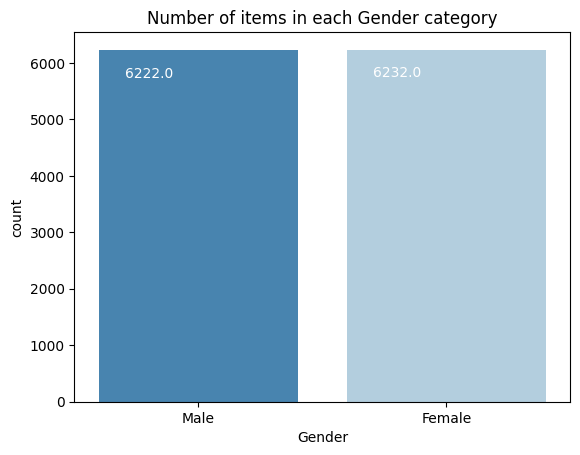

In [368]:
count_values(train, "Gender")

There are almost an equal number of females and males in the dataset. Data is available for slightly more women than men but this does not make it imbalanced.

In [369]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.

    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")

    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")

    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [370]:
train["Age"].describe()

count    12454.000000
mean        23.975410
std          6.592500
min         14.000000
25%         19.979810
50%         22.815416
75%         26.000000
max        133.000000
Name: Age, dtype: float64

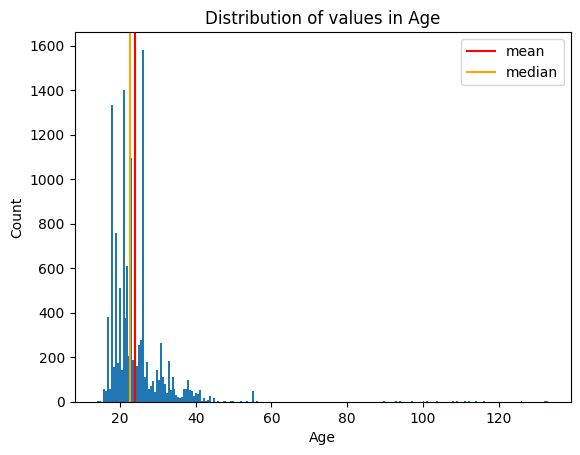

In [371]:
plot_distribution(train, "Age")

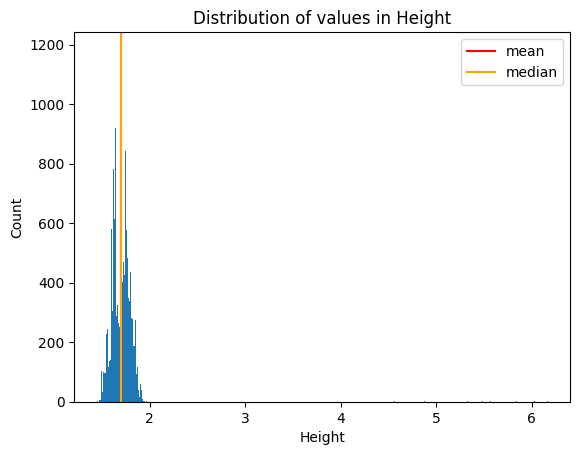

In [372]:
plot_distribution(train, "Height")

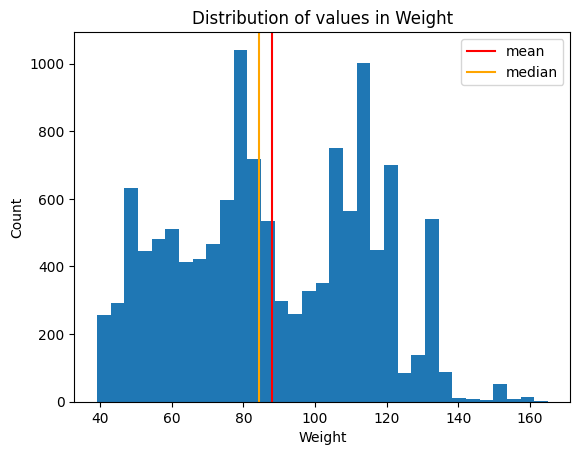

In [373]:
plot_distribution(train, "Weight")

<Figure size 1500x800 with 0 Axes>

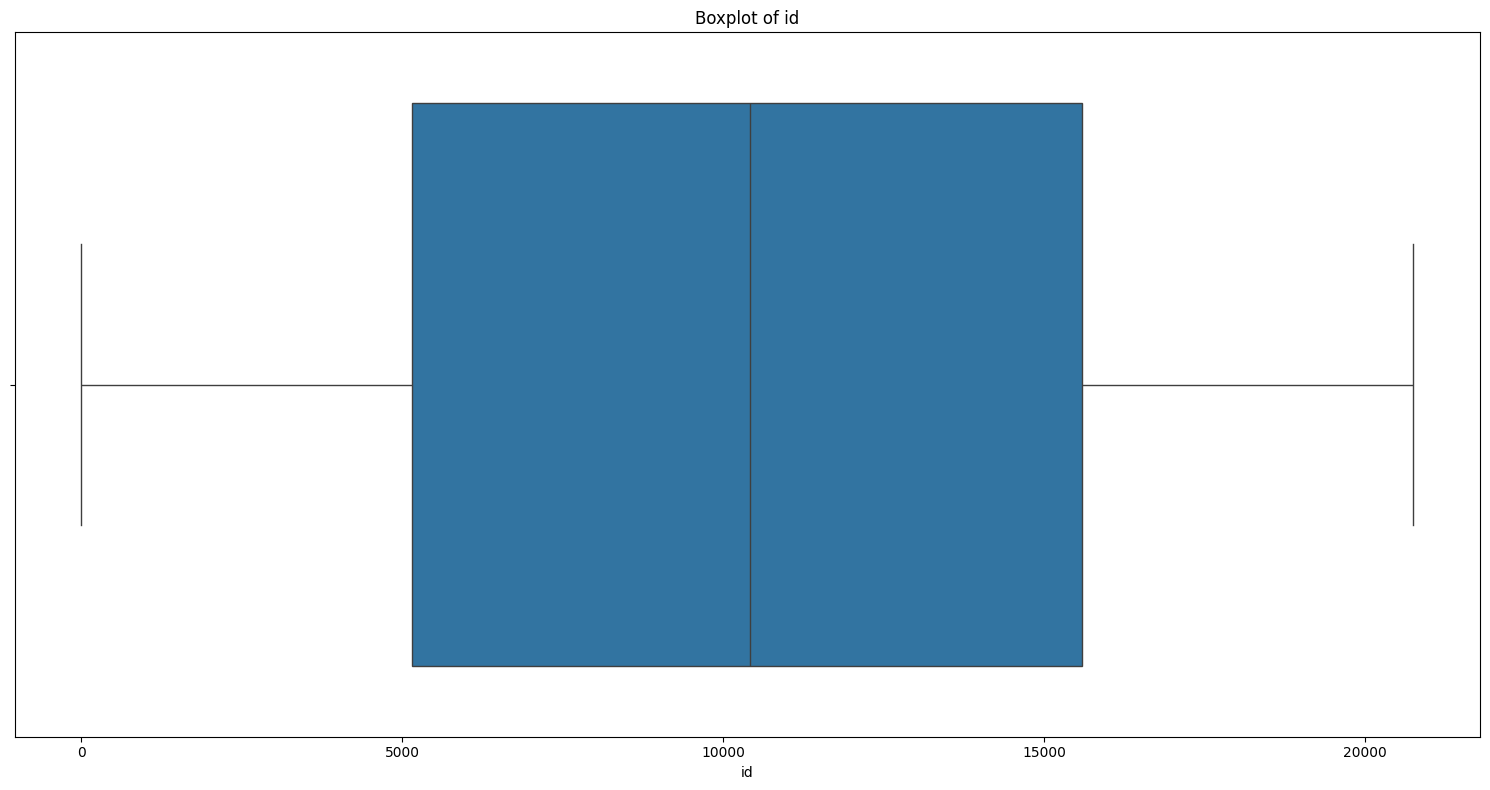

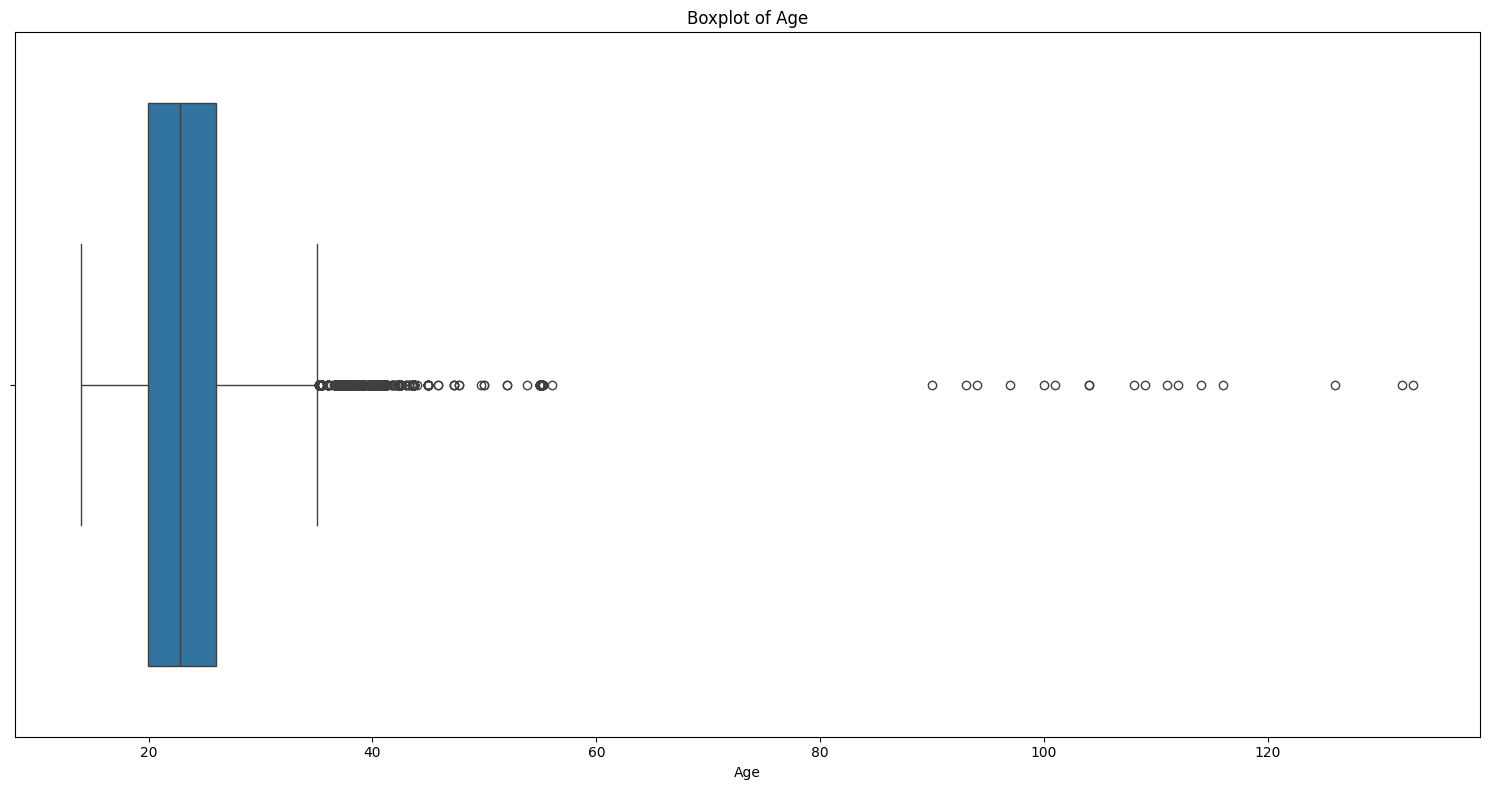

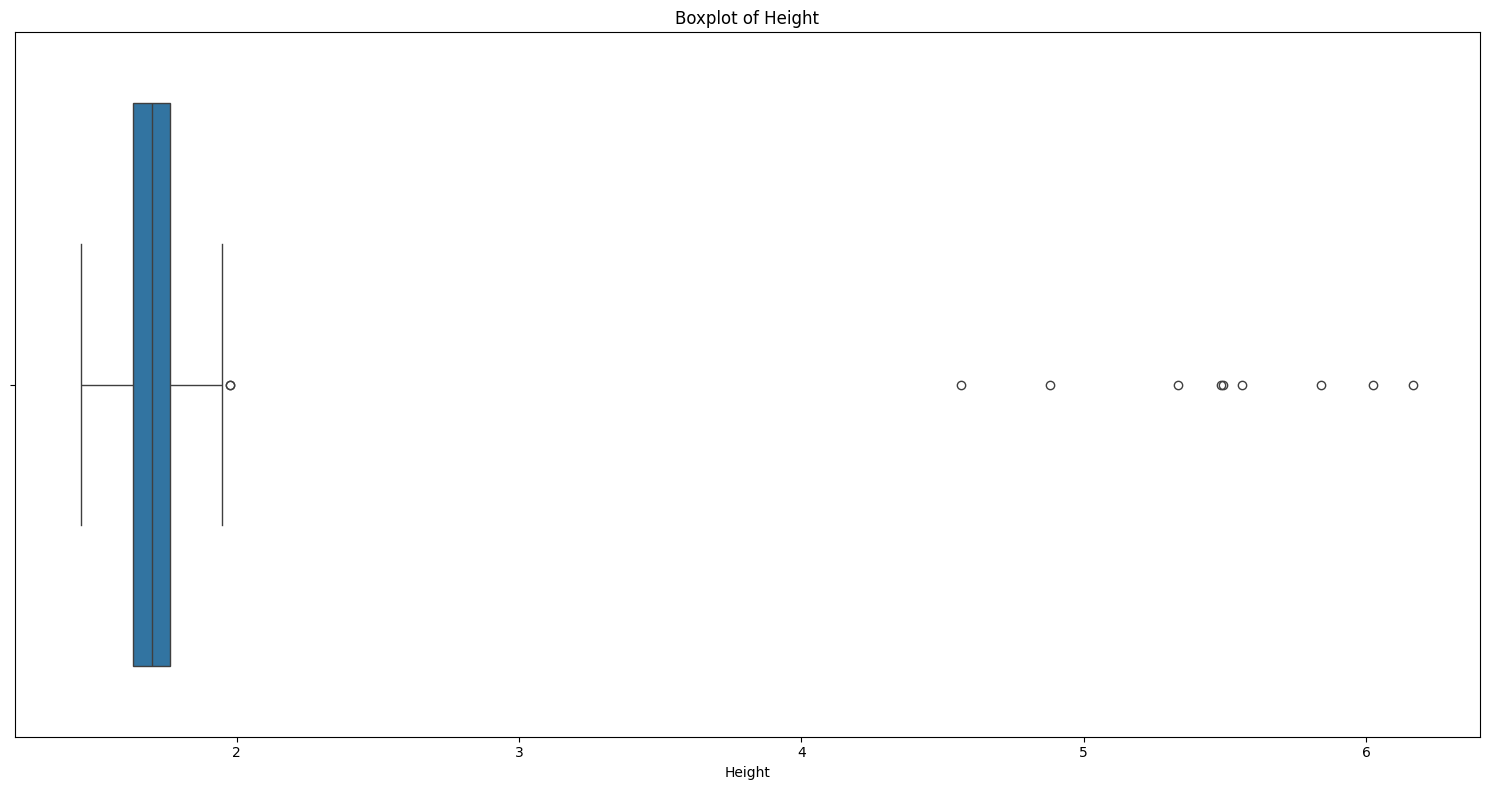

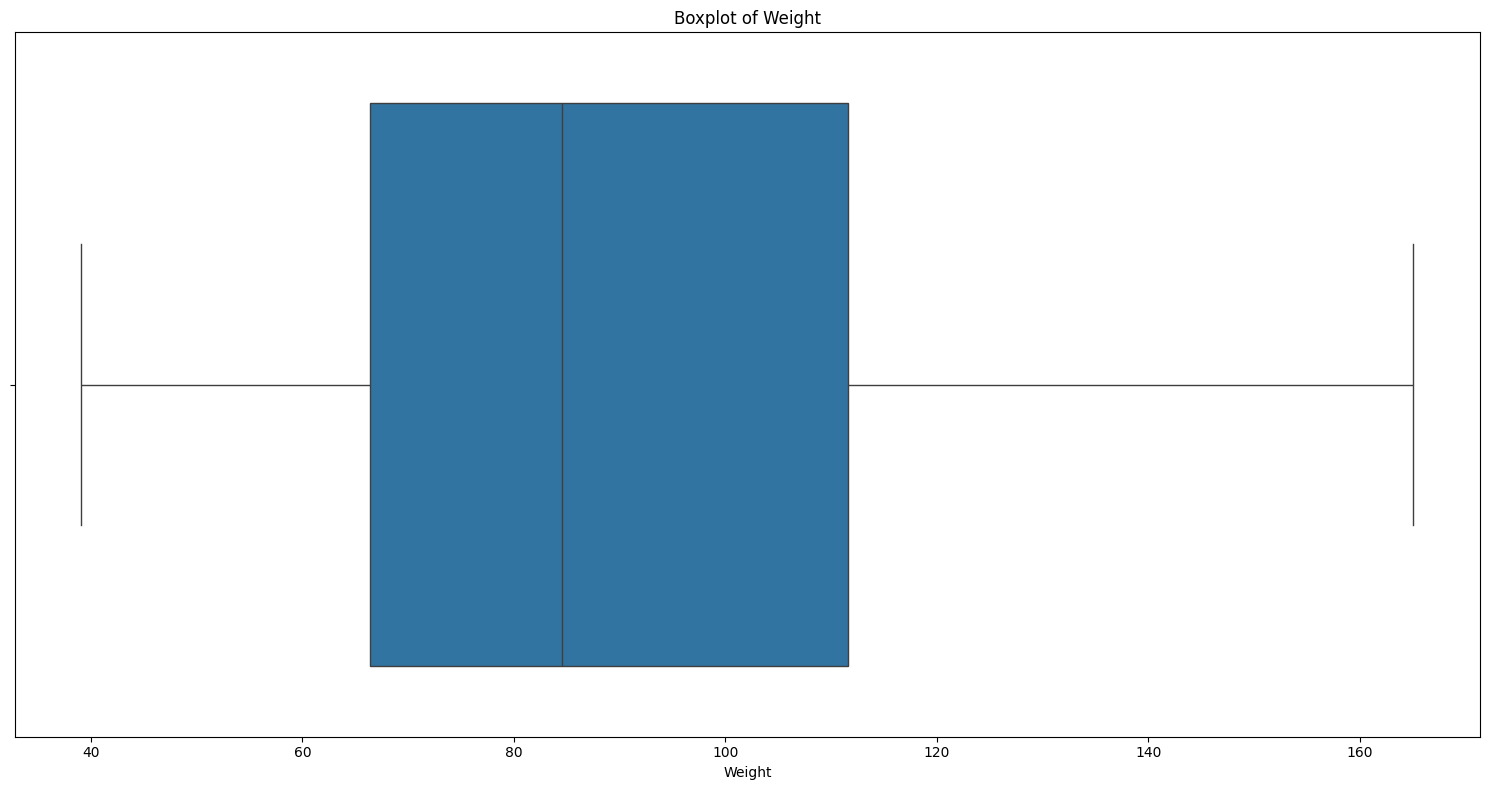

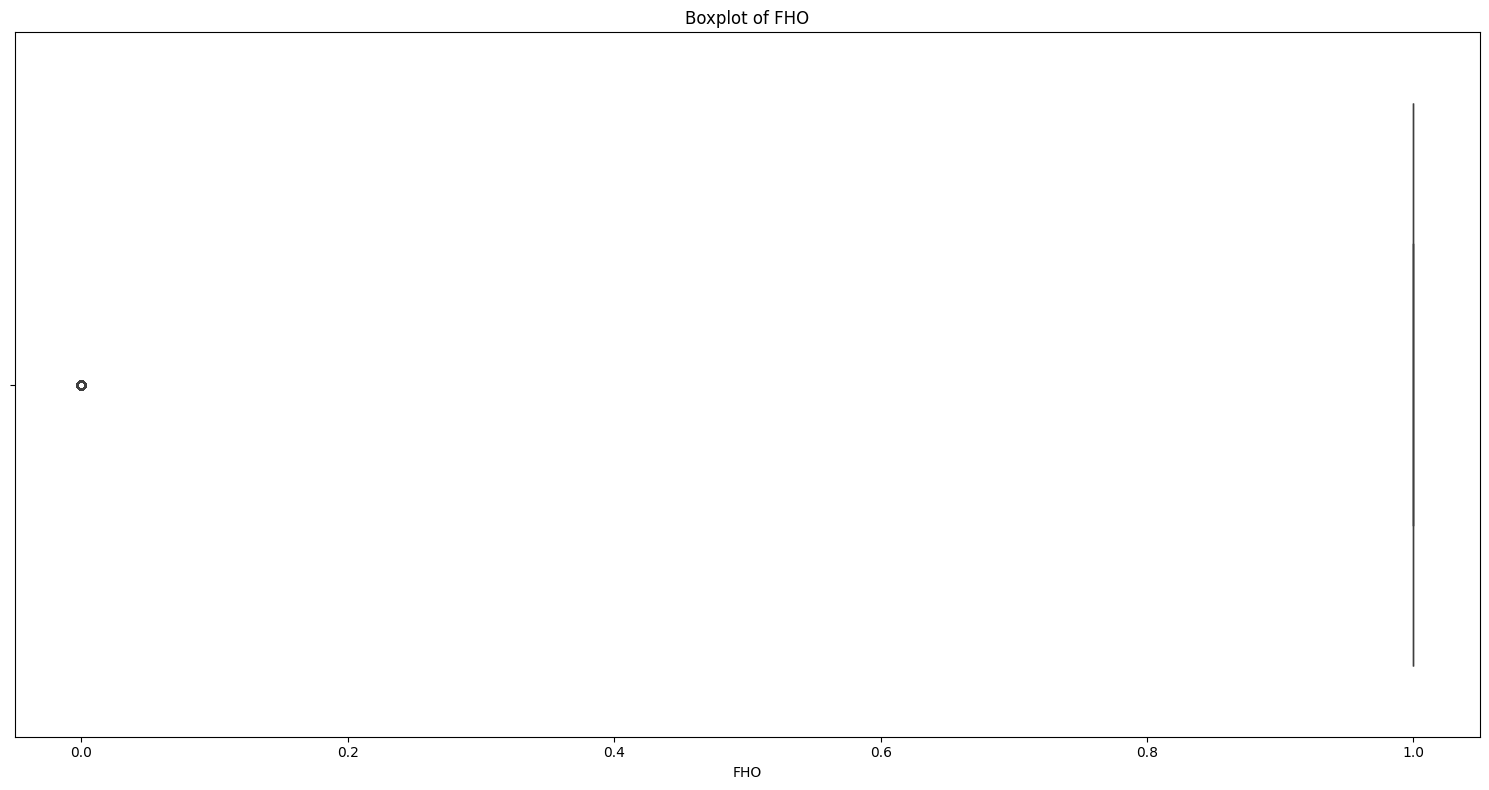

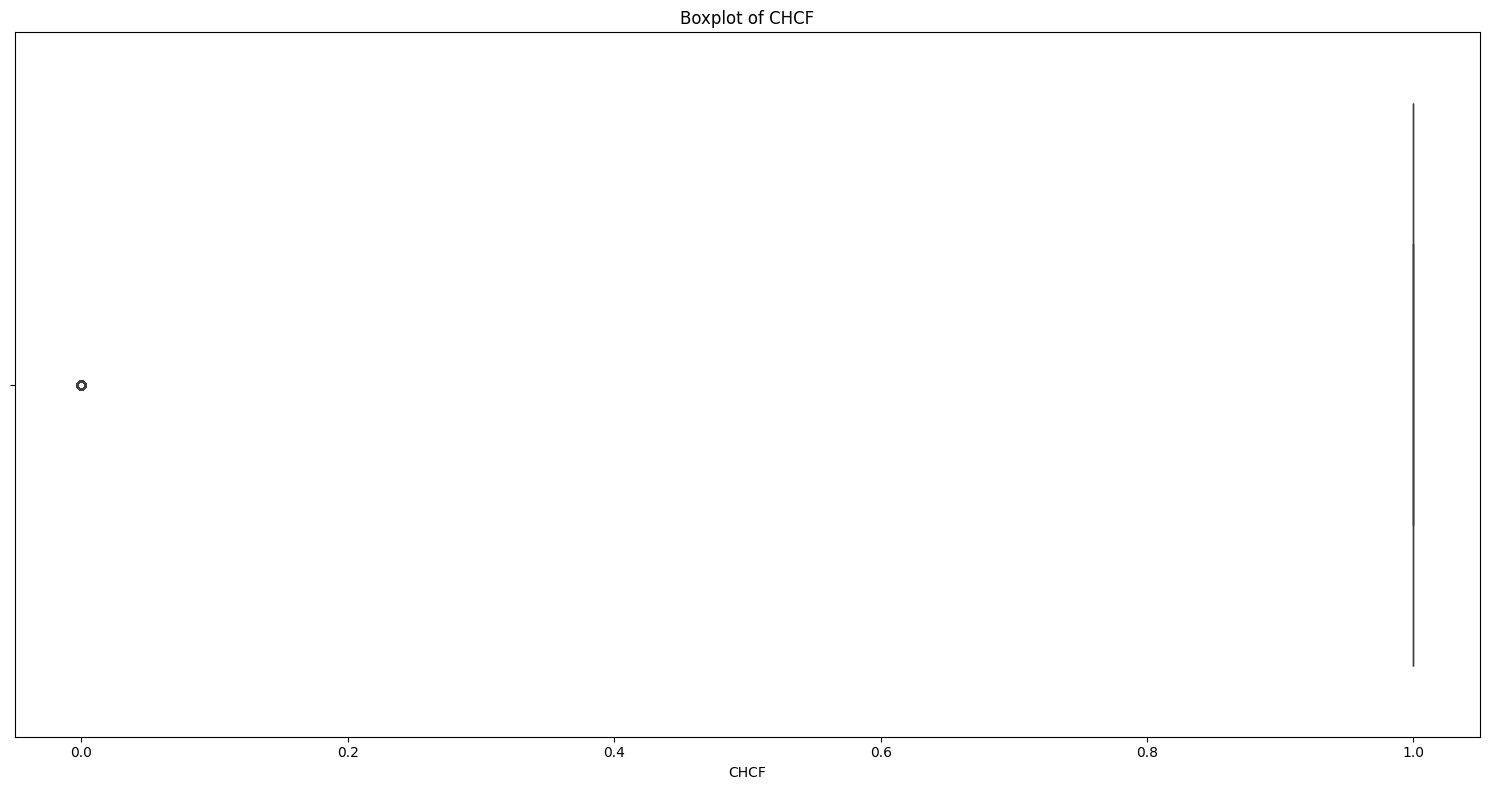

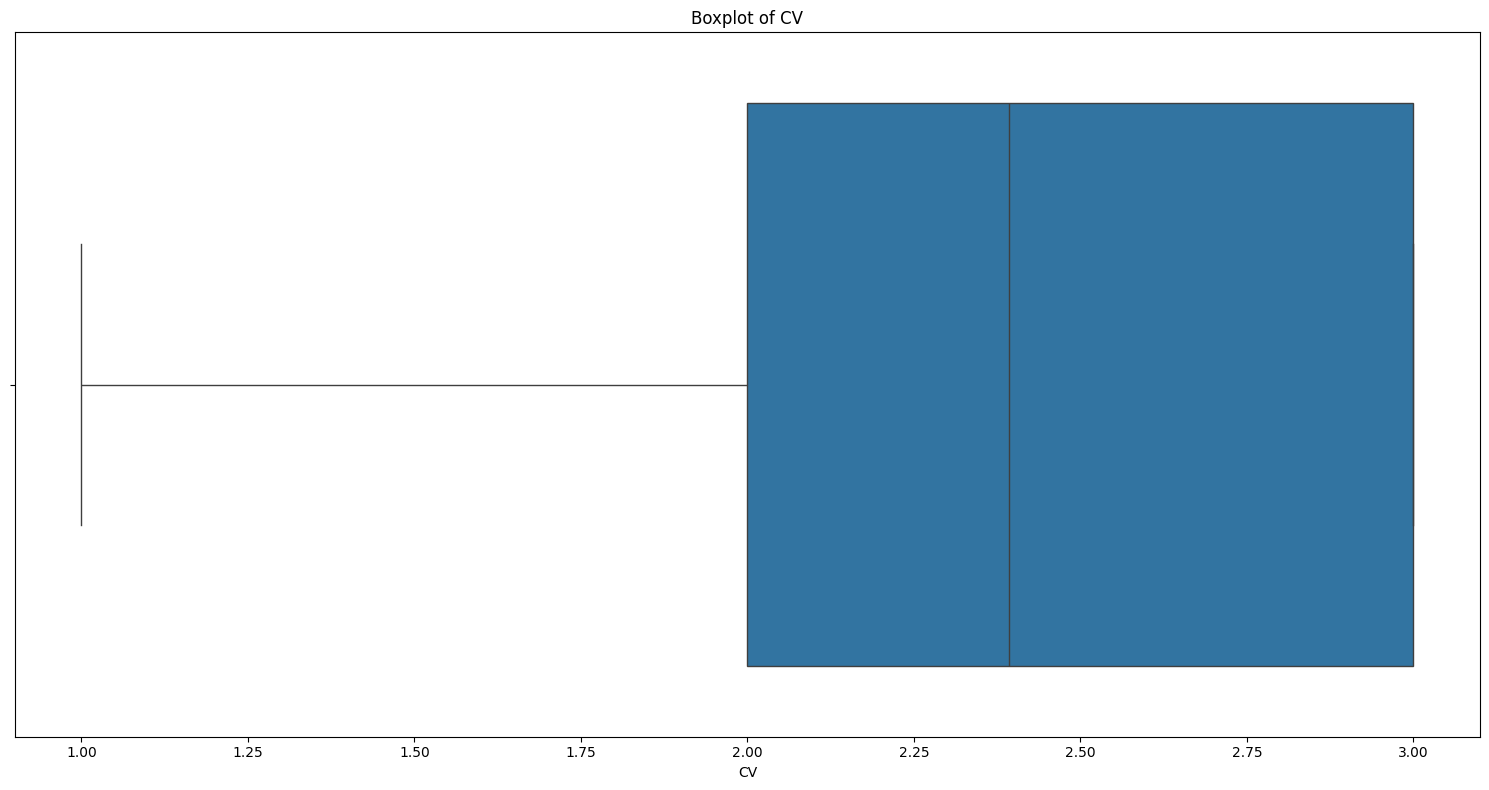

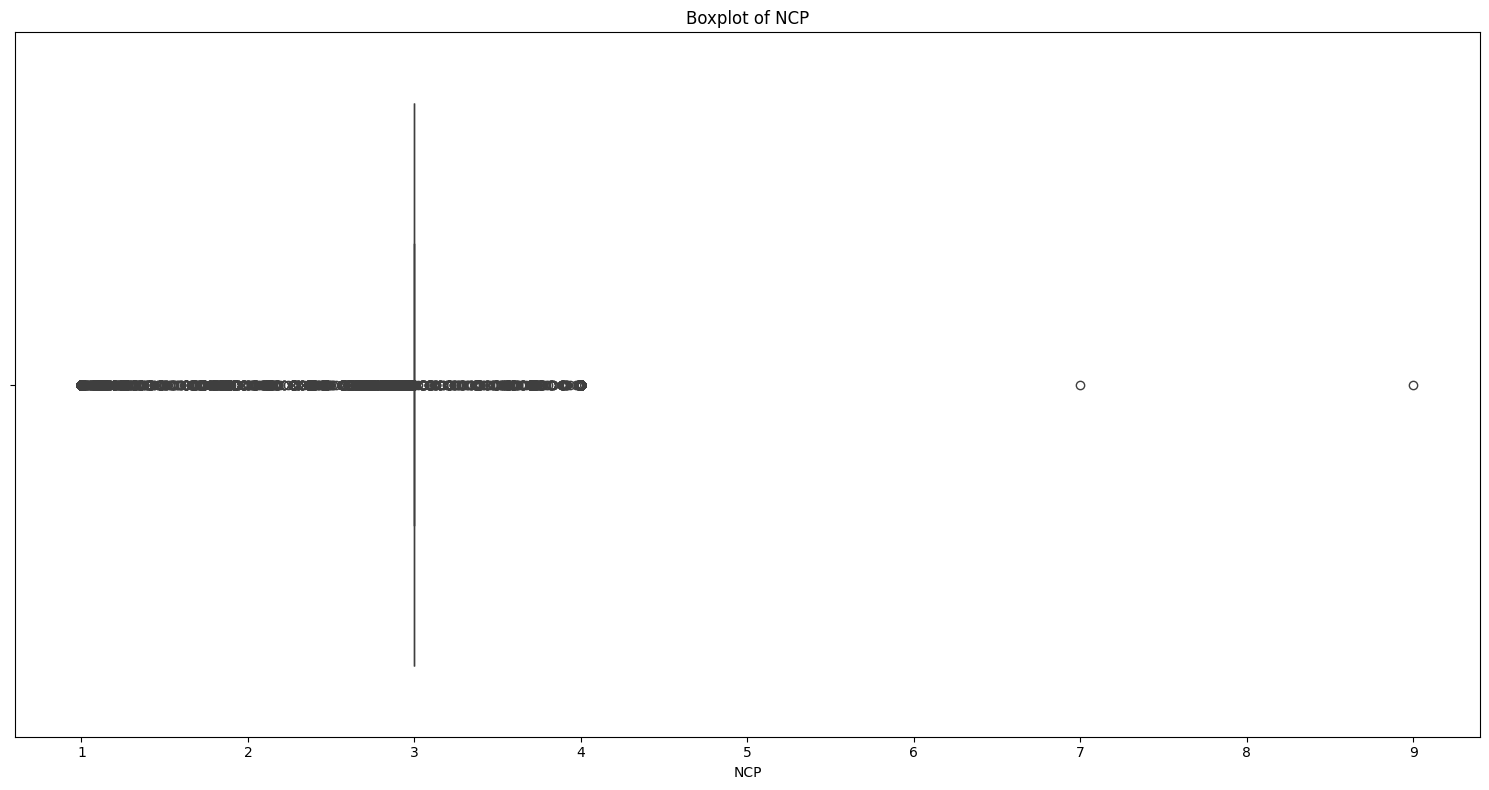

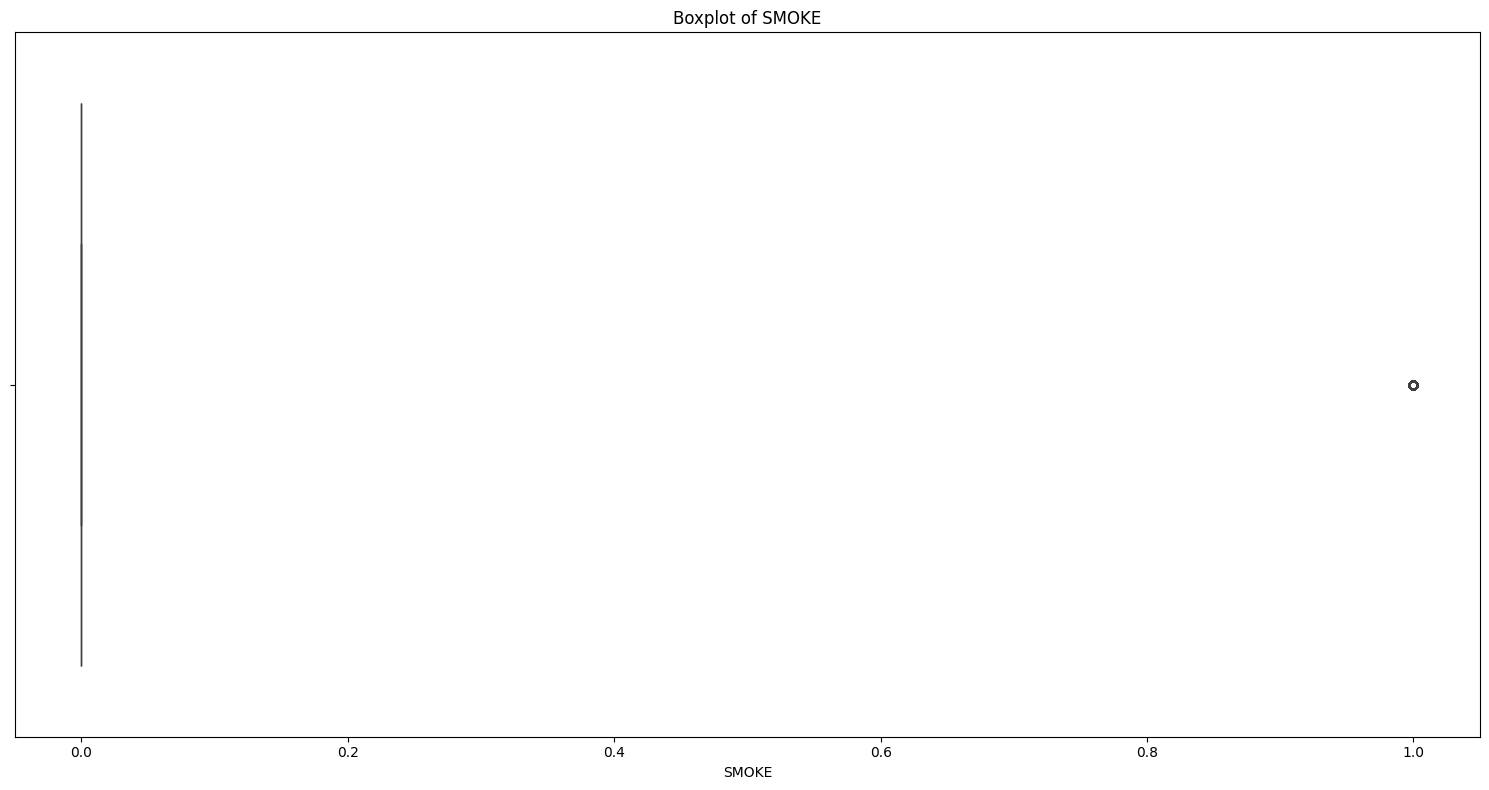

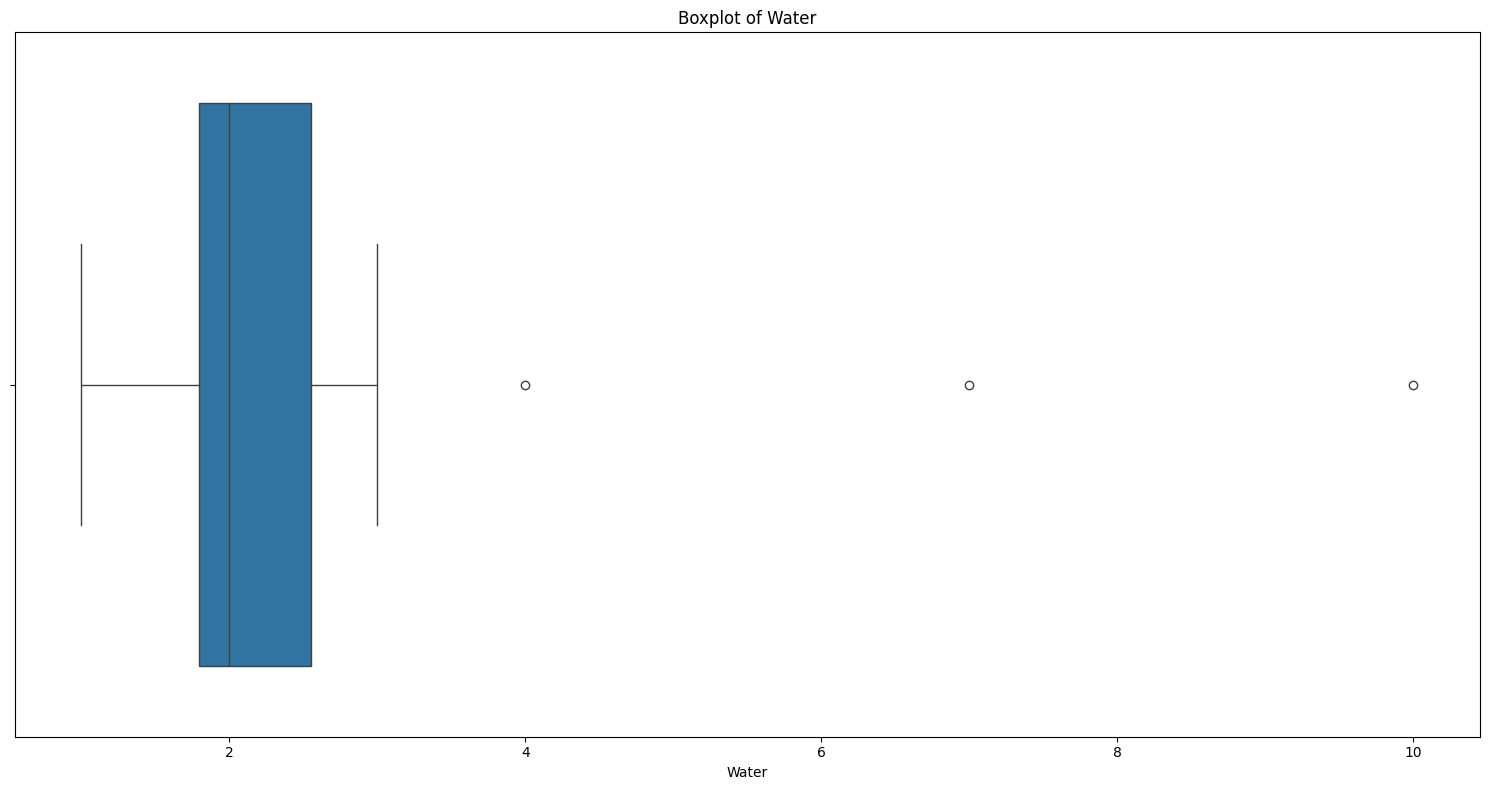

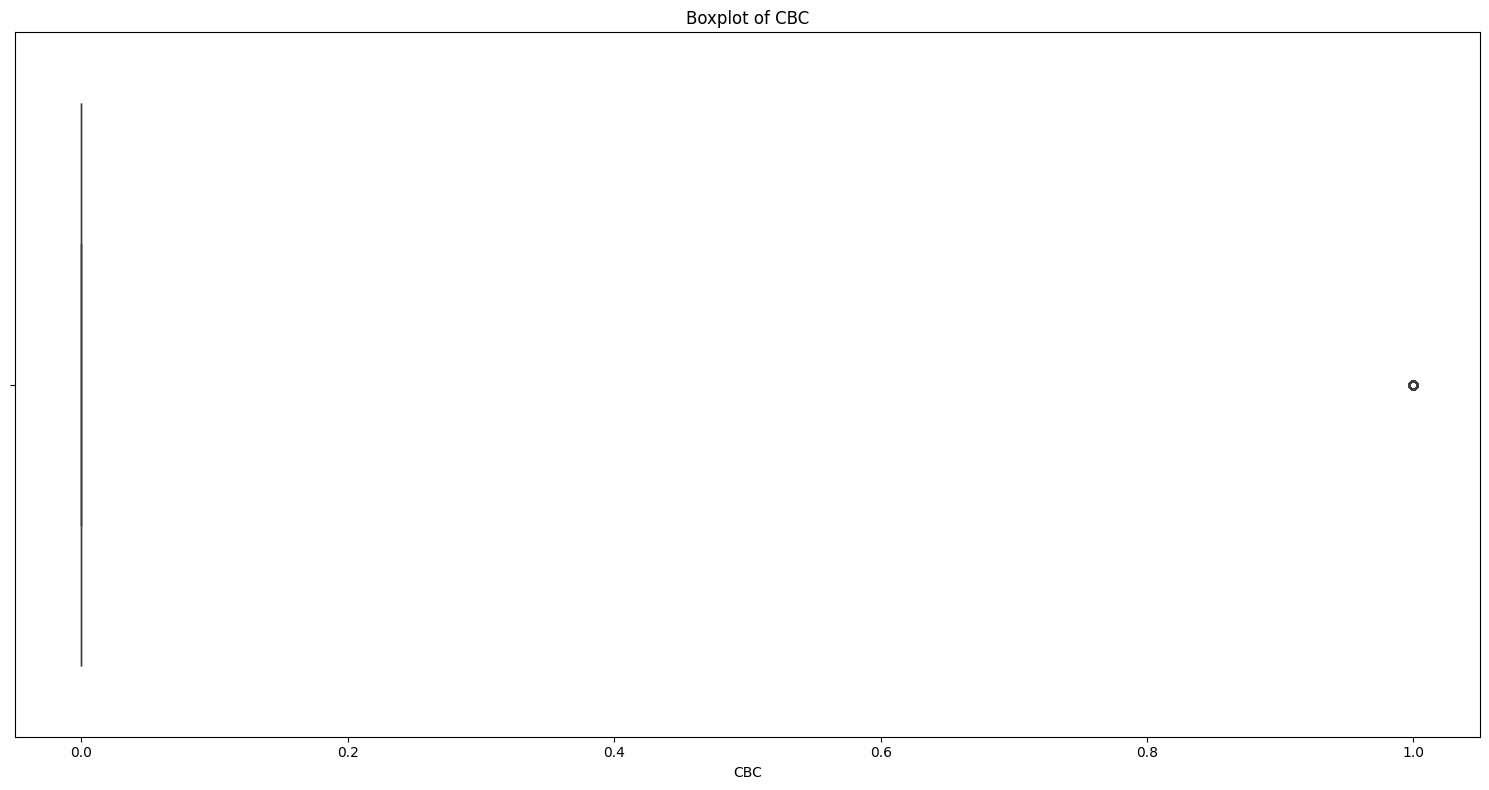

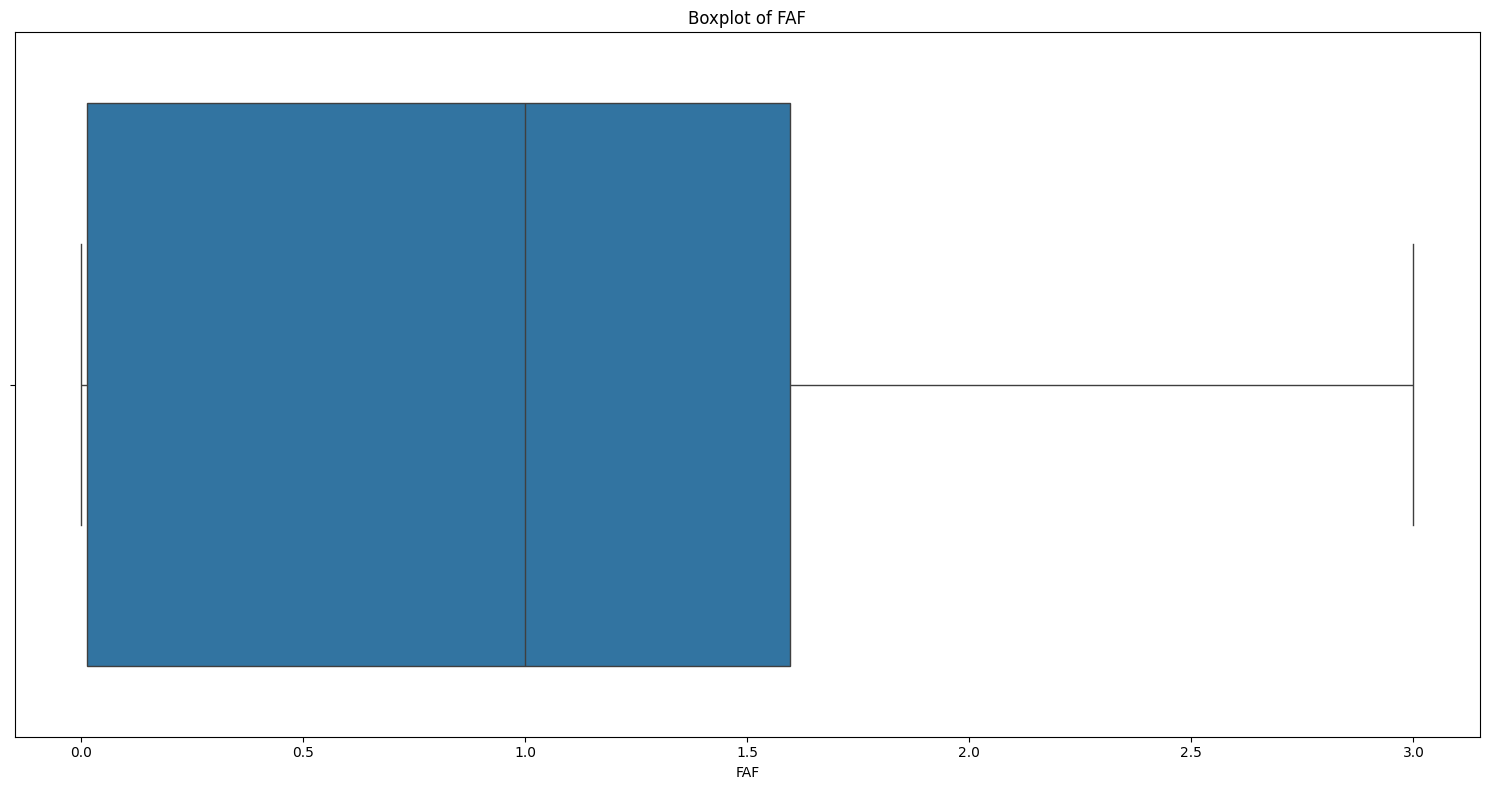

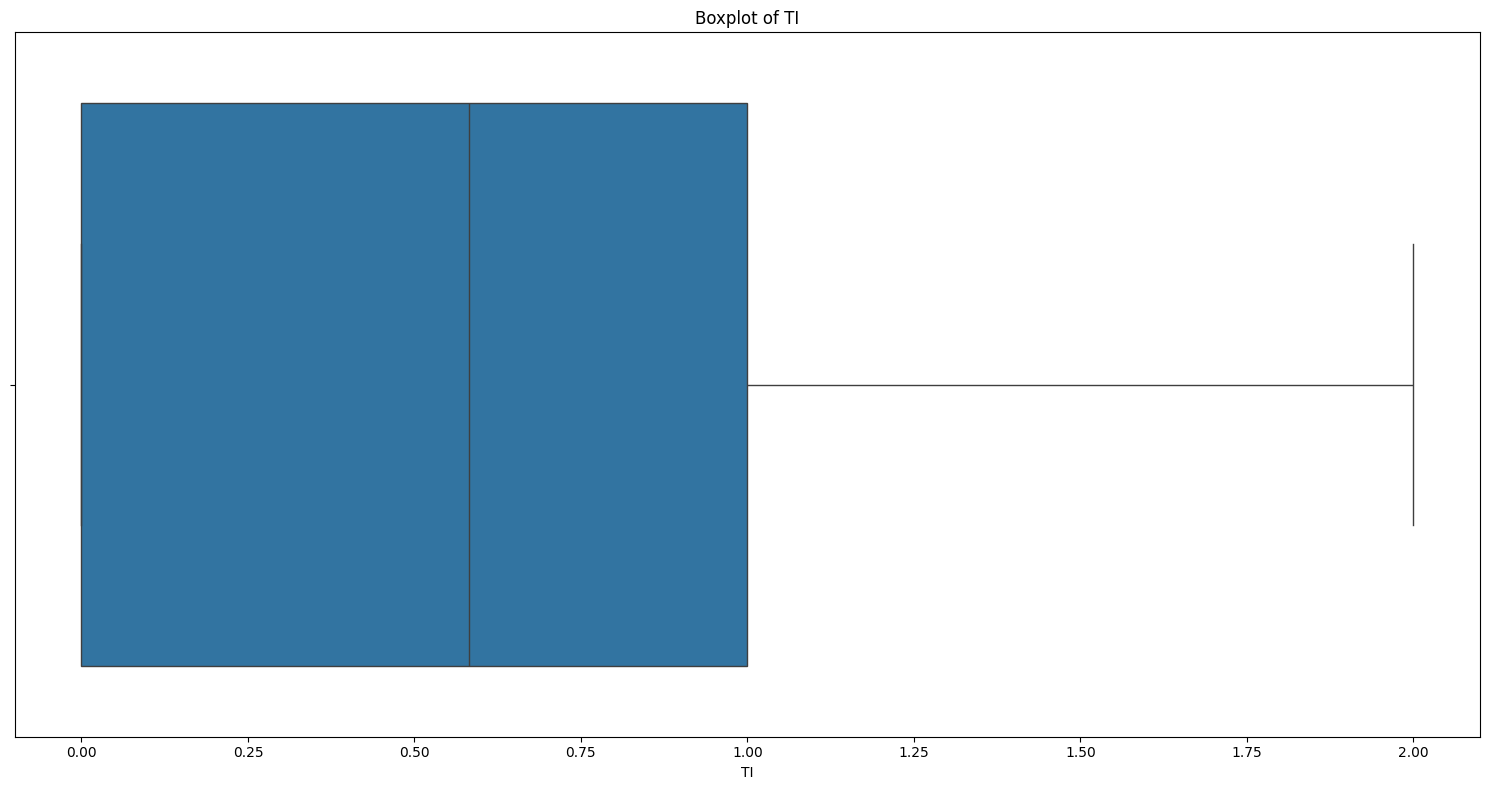

In [374]:
# Get the list of numeric columns in the DataFrame
numeric_cols = train.select_dtypes(include='number').columns

# Plot individual boxplots for each numeric column using seaborn in a loop
plt.figure(figsize=(15, 8))  # Increased figure size

for i, col in enumerate(numeric_cols, start=1):
    plt.figure(figsize=(15, 8))  # Increased figure size
    sns.boxplot(x=col, data=train)
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [375]:
ID=test["id"]

In [376]:
train.drop(['id'],axis=1,inplace=True)

In [377]:
train

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level
0,SunderNagar,Male,23.000000,1.700000,83.000000,1.0,0,2.000000,3.0,Sometimes,0,3.000000,0,3.000000,1.000000,Never,Walking,Overweight_Level_II
1,Punjabi Bagh,Female,23.000000,1.600000,84.000000,1.0,1,2.000000,3.0,Sometimes,0,3.000000,0,3.000000,0.000000,Never,Public_Transportation,Obesity_Type_I
2,VikasPuri,Female,28.825223,1.549748,65.220249,1.0,0,2.000000,3.0,Sometimes,0,1.984323,0,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
3,Vasant Vihar,Male,25.341399,1.787195,115.428276,1.0,1,2.967300,3.0,Sometimes,0,2.535127,0,0.849811,1.899330,Sometimes,Public_Transportation,Obesity_Type_II
4,Vasant Vihar,Male,22.000000,1.750000,58.000000,0.0,1,2.000000,4.0,Sometimes,0,2.000000,0,2.000000,0.000000,Never,Public_Transportation,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,SunderNagar,Female,26.000000,1.639251,111.946321,1.0,1,3.000000,3.0,Sometimes,0,2.640539,0,0.000000,0.456462,Sometimes,Public_Transportation,Obesity_Type_III
12450,VikasPuri,Male,17.000000,1.700000,87.937533,1.0,1,2.000000,3.0,Sometimes,0,2.000000,0,2.000000,2.000000,Sometimes,Automobile,Obesity_Type_I
12451,Hauz Khas,Male,23.000000,1.900000,95.000000,1.0,1,2.000000,3.0,Always,0,3.000000,0,3.000000,1.000000,Frequently,Walking,Obesity_Type_I
12452,Punjabi Bagh,Male,24.000000,1.790000,84.000000,1.0,0,2.000000,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II


In [378]:
test.drop(['id'],axis=1,inplace=True)

In [379]:
test

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode
0,Punjabi Bagh,Female,25.951979,1.669039,104.954291,1.0,1,3.000000,3.0,Sometimes,0,2.092326,0,0.043101,0.540812,Sometimes,Public_Transportation
1,Hauz Khas,Female,40.993179,1.567973,81.022119,1.0,1,2.921576,3.0,Sometimes,0,1.005727,0,1.034031,0.000000,Never,Automobile
2,Vasant Vihar,Male,21.000000,1.740000,76.000000,0.0,1,3.000000,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
3,Hauz Khas,Male,33.000000,1.680000,83.000000,1.0,1,2.000000,1.0,Sometimes,0,2.000000,0,1.000000,0.000000,Sometimes,Automobile
4,SunderNagar,Female,35.194089,1.673482,73.193589,1.0,0,3.000000,3.0,Sometimes,0,1.572371,0,1.806740,0.000000,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,Punjabi Bagh,Female,20.000000,1.600000,42.000000,0.0,1,3.000000,1.0,Frequently,0,1.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
8300,Vasant Vihar,Female,21.420537,1.739457,133.735889,1.0,1,3.000000,3.0,Sometimes,0,2.310921,0,1.618512,0.711331,Sometimes,Public_Transportation
8301,Punjabi Bagh,Female,18.000000,1.600000,60.000000,0.0,1,3.000000,3.0,Always,0,2.000000,0,1.000000,0.000000,Never,Public_Transportation
8302,Vasant Vihar,Female,18.014333,1.624099,45.000000,0.0,1,3.000000,3.0,Sometimes,0,2.000000,1,1.637368,0.105936,Sometimes,Public_Transportation


In [380]:
for i in train.columns:
  print(f"{i} -> {train[i].nunique()}")

Location -> 5
Gender -> 2
Age -> 1525
Height -> 1658
Weight -> 1737
FHO -> 2
CHCF -> 2
CV -> 822
NCP -> 620
CAEC -> 4
SMOKE -> 2
Water -> 1328
CBC -> 2
FAF -> 1222
TI -> 1147
CA -> 3
Mode -> 6
Obesity_Level -> 7


In [381]:
train["Obesity_Level"].unique()

array(['Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Insufficient_Weight', 'Obesity_Type_III', 'Overweight_Level_I',
       'Normal_Weight'], dtype=object)

In [382]:
w_encoding = {}
keys=train["Obesity_Level"].unique()
values=[3,4,5,0,6,2,1]
# Iterate through the list and add each element as a key to the dictionary
for key, value in zip(keys, values):
    w_encoding[key] = value
w_encoding

{'Overweight_Level_II': 3,
 'Obesity_Type_I': 4,
 'Obesity_Type_II': 5,
 'Insufficient_Weight': 0,
 'Obesity_Type_III': 6,
 'Overweight_Level_I': 2,
 'Normal_Weight': 1}

In [383]:
train['Obesity_Level_encoded'] = train['Obesity_Level'].map(w_encoding)

# Drop the original Obesity_Level column
train.drop(columns=['Obesity_Level'], inplace=True)

In [384]:
# test['Obesity_Level_encoded'] = test['Obesity_Level'].map(w_encoding)
# test.drop(columns=['Obesity_Level'], inplace=True)

In [385]:
# train.drop(columns=['Height','Weight'], inplace=True)

In [386]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12454 entries, 0 to 12453
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               12454 non-null  object 
 1   Gender                 12454 non-null  object 
 2   Age                    12454 non-null  float64
 3   Height                 12454 non-null  float64
 4   Weight                 12454 non-null  float64
 5   FHO                    12454 non-null  float64
 6   CHCF                   12454 non-null  int64  
 7   CV                     12454 non-null  float64
 8   NCP                    12454 non-null  float64
 9   CAEC                   12454 non-null  object 
 10  SMOKE                  12454 non-null  int64  
 11  Water                  12454 non-null  float64
 12  CBC                    12454 non-null  int64  
 13  FAF                    12454 non-null  float64
 14  TI                     12454 non-null  float64
 15  CA

In [387]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['Location', 'CAEC', 'CA', 'Mode']

# Initialize OneHotEncoder
oe_style = OneHotEncoder()

# Fit and transform the selected columns
oe_results = oe_style.fit_transform(train[columns_to_encode])

# Get feature names
feature_names = oe_style.get_feature_names_out(input_features=columns_to_encode)

# Convert the result to a DataFrame
encoded_df = pd.DataFrame(oe_results.toarray(), columns=feature_names)

print("DataFrame after one-hot encoding:")
# print(encoded_df)
encoded_df

DataFrame after one-hot encoding:


,Location_Hauz Khas,Location_Punjabi Bagh,Location_SunderNagar,Location_Vasant Vihar,Location_VikasPuri,CAEC_Always,CAEC_Frequently,CAEC_Never,CAEC_Sometimes,CA_Frequently,CA_Never,CA_Sometimes,Mode_,Mode_Automobile,Mode_Bike,Mode_Motorbike,Mode_Public_Transportation,Mode_Walking
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12450,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
12451,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12452,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Large number of new columns , thus not good for the model

In [388]:
!pip install category_encoders

In [389]:
from category_encoders import TargetEncoder
te_df=train.copy()
test_df=test.copy()
convert_obj=['FHO','CHCF', 'SMOKE','CBC']
for col in convert_obj:
  te_df[col] = te_df[col].astype('object')
  test_df[col] = test_df[col].astype('object')
columns_to_encode = ['Location', 'CAEC','Gender', 'FHO','CHCF', 'SMOKE','CBC', 'CA', 'Mode']
for col in columns_to_encode:
    te=TargetEncoder()
    te_df[col]=te.fit_transform(te_df[col],te_df["Obesity_Level_encoded"])
    test_df[col] = te.transform(test[col])
te_df

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level_encoded
0,3.245968,3.132594,23.000000,1.700000,83.000000,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,3.000000,1.000000,2.492889,1.643098,3
1,3.310524,3.379653,23.000000,1.600000,84.000000,3.762250,3.389425,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,3.000000,0.000000,2.492889,3.326379,4
2,3.163372,3.379653,28.825223,1.549748,65.220249,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,1.984323,3.329344,1.000000,0.000000,3.541961,3.326379,3
3,3.254362,3.132594,25.341399,1.787195,115.428276,3.762250,3.389425,2.967300,3.0,3.673101,3.253047,2.535127,3.329344,0.849811,1.899330,3.541961,3.326379,5
4,3.254362,3.132594,22.000000,1.750000,58.000000,0.961333,3.389425,2.000000,4.0,3.673101,3.253047,2.000000,3.329344,2.000000,0.000000,2.492889,3.326379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,3.245968,3.379653,26.000000,1.639251,111.946321,3.762250,3.389425,3.000000,3.0,3.673101,3.253047,2.640539,3.329344,0.000000,0.456462,3.541961,3.326379,6
12450,3.163372,3.132594,17.000000,1.700000,87.937533,3.762250,3.389425,2.000000,3.0,3.673101,3.253047,2.000000,3.329344,2.000000,2.000000,3.541961,3.184803,4
12451,3.307820,3.132594,23.000000,1.900000,95.000000,3.762250,3.389425,2.000000,3.0,1.589928,3.253047,3.000000,3.329344,3.000000,1.000000,2.513158,1.643098,4
12452,3.310524,3.132594,24.000000,1.790000,84.000000,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,1.000000,0.000000,3.541961,3.184803,3


In [390]:
test_df.head()

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode
0,3.310524,3.379653,25.951979,1.669039,104.954291,3.762250,3.389425,3.000000,3.0,3.673101,3.253047,2.092326,3.329344,0.043101,0.540812,3.541961,3.326379
1,3.307820,3.379653,40.993179,1.567973,81.022119,3.762250,3.389425,2.921576,3.0,3.673101,3.253047,1.005727,3.329344,1.034031,0.000000,2.492889,3.184803
2,3.254362,3.132594,21.000000,1.740000,76.000000,0.961333,3.389425,3.000000,3.0,3.673101,3.253047,3.000000,3.329344,1.000000,0.000000,3.541961,3.326379
3,3.307820,3.132594,33.000000,1.680000,83.000000,3.762250,3.389425,2.000000,1.0,3.673101,3.253047,2.000000,3.329344,1.000000,0.000000,3.541961,3.184803
4,3.245968,3.379653,35.194089,1.673482,73.193589,3.762250,1.809524,3.000000,3.0,3.673101,3.253047,1.572371,3.329344,1.806740,0.000000,3.541961,3.184803


In [391]:
# train[['Location', 'Gender', 'CAEC', 'CA', 'Mode','Obesity_Level']] = train[['Location', 'Gender', 'CAEC', 'CA', 'Mode','Obesity_Level']].apply(LabelEncoder().fit_transform)

# test[['Location', 'Gender', 'CAEC', 'CA', 'Mode']] = test[['Location', 'Gender', 'CAEC', 'CA', 'Mode']].apply(LabelEncoder().fit_transform)



In [392]:
te_df

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level_encoded
0,3.245968,3.132594,23.000000,1.700000,83.000000,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,3.000000,1.000000,2.492889,1.643098,3
1,3.310524,3.379653,23.000000,1.600000,84.000000,3.762250,3.389425,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,3.000000,0.000000,2.492889,3.326379,4
2,3.163372,3.379653,28.825223,1.549748,65.220249,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,1.984323,3.329344,1.000000,0.000000,3.541961,3.326379,3
3,3.254362,3.132594,25.341399,1.787195,115.428276,3.762250,3.389425,2.967300,3.0,3.673101,3.253047,2.535127,3.329344,0.849811,1.899330,3.541961,3.326379,5
4,3.254362,3.132594,22.000000,1.750000,58.000000,0.961333,3.389425,2.000000,4.0,3.673101,3.253047,2.000000,3.329344,2.000000,0.000000,2.492889,3.326379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,3.245968,3.379653,26.000000,1.639251,111.946321,3.762250,3.389425,3.000000,3.0,3.673101,3.253047,2.640539,3.329344,0.000000,0.456462,3.541961,3.326379,6
12450,3.163372,3.132594,17.000000,1.700000,87.937533,3.762250,3.389425,2.000000,3.0,3.673101,3.253047,2.000000,3.329344,2.000000,2.000000,3.541961,3.184803,4
12451,3.307820,3.132594,23.000000,1.900000,95.000000,3.762250,3.389425,2.000000,3.0,1.589928,3.253047,3.000000,3.329344,3.000000,1.000000,2.513158,1.643098,4
12452,3.310524,3.132594,24.000000,1.790000,84.000000,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,1.000000,0.000000,3.541961,3.184803,3


In [393]:
import pandas as pd

def calculate_bmi(weight, height):
    """Function to calculate BMI"""
    bmi = weight / ((height) ** 2)  # Converting height from cm to meters
    return bmi

def add_bmi_column(df, weight_column, height_column):
    """Function to add BMI column to dataframe"""
    df['BMI'] = calculate_bmi(df['Weight'], df['Height'])
    return df


te_df = add_bmi_column(te_df, te_df['Weight'], te_df['Height'])
add_bmi_column(test_df, test_df['Weight'], test_df['Height'])


,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,BMI
0,3.310524,3.379653,25.951979,1.669039,104.954291,3.762250,3.389425,3.000000,3.0,3.673101,3.253047,2.092326,3.329344,0.043101,0.540812,3.541961,3.326379,37.676212
1,3.307820,3.379653,40.993179,1.567973,81.022119,3.762250,3.389425,2.921576,3.0,3.673101,3.253047,1.005727,3.329344,1.034031,0.000000,2.492889,3.184803,32.955389
2,3.254362,3.132594,21.000000,1.740000,76.000000,0.961333,3.389425,3.000000,3.0,3.673101,3.253047,3.000000,3.329344,1.000000,0.000000,3.541961,3.326379,25.102391
3,3.307820,3.132594,33.000000,1.680000,83.000000,3.762250,3.389425,2.000000,1.0,3.673101,3.253047,2.000000,3.329344,1.000000,0.000000,3.541961,3.184803,29.407596
4,3.245968,3.379653,35.194089,1.673482,73.193589,3.762250,1.809524,3.000000,3.0,3.673101,3.253047,1.572371,3.329344,1.806740,0.000000,3.541961,3.184803,26.135508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,3.310524,3.379653,20.000000,1.600000,42.000000,0.961333,3.389425,3.000000,1.0,0.881214,3.253047,1.000000,3.329344,0.000000,0.000000,3.541961,3.326379,16.406250
8300,3.254362,3.379653,21.420537,1.739457,133.735889,3.762250,3.389425,3.000000,3.0,3.673101,3.253047,2.310921,3.329344,1.618512,0.711331,3.541961,3.326379,44.199827
8301,3.310524,3.379653,18.000000,1.600000,60.000000,0.961333,3.389425,3.000000,3.0,1.589928,3.253047,2.000000,3.329344,1.000000,0.000000,2.492889,3.326379,23.437500
8302,3.254362,3.379653,18.014333,1.624099,45.000000,0.961333,3.389425,3.000000,3.0,3.673101,3.253047,2.000000,1.166271,1.637368,0.105936,3.541961,3.326379,17.060333


In [394]:
te_df

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level_encoded,BMI
0,3.245968,3.132594,23.000000,1.700000,83.000000,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,3.000000,1.000000,2.492889,1.643098,3,28.719723
1,3.310524,3.379653,23.000000,1.600000,84.000000,3.762250,3.389425,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,3.000000,0.000000,2.492889,3.326379,4,32.812500
2,3.163372,3.379653,28.825223,1.549748,65.220249,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,1.984323,3.329344,1.000000,0.000000,3.541961,3.326379,3,27.155655
3,3.254362,3.132594,25.341399,1.787195,115.428276,3.762250,3.389425,2.967300,3.0,3.673101,3.253047,2.535127,3.329344,0.849811,1.899330,3.541961,3.326379,5,36.138351
4,3.254362,3.132594,22.000000,1.750000,58.000000,0.961333,3.389425,2.000000,4.0,3.673101,3.253047,2.000000,3.329344,2.000000,0.000000,2.492889,3.326379,0,18.938776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12449,3.245968,3.379653,26.000000,1.639251,111.946321,3.762250,3.389425,3.000000,3.0,3.673101,3.253047,2.640539,3.329344,0.000000,0.456462,3.541961,3.326379,6,41.659966
12450,3.163372,3.132594,17.000000,1.700000,87.937533,3.762250,3.389425,2.000000,3.0,3.673101,3.253047,2.000000,3.329344,2.000000,2.000000,3.541961,3.184803,4,30.428212
12451,3.307820,3.132594,23.000000,1.900000,95.000000,3.762250,3.389425,2.000000,3.0,1.589928,3.253047,3.000000,3.329344,3.000000,1.000000,2.513158,1.643098,4,26.315789
12452,3.310524,3.132594,24.000000,1.790000,84.000000,3.762250,1.809524,2.000000,3.0,3.673101,3.253047,3.000000,3.329344,1.000000,0.000000,3.541961,3.184803,3,26.216410


In [395]:
# train = train[(train['Height'] <3)]

In [396]:
# train.drop(['Height','Weight'],axis=1,inplace=True)

In [397]:
# test

In [398]:
te_df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)
test_df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

In [399]:
te_df[te_df["Weight"]==te_df["Weight"].max()]

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode,Obesity_Level_encoded,BMI
4673,3.163372,3.379653,21.238416,1.819296,165.057269,3.76225,3.389425,3.0,3.0,3.673101,3.253047,2.351193,3.329344,0.259424,0.675076,3.541961,3.326379,6,49.868686


In [400]:
std_per_column = te_df.std()

print("Standard deviation for each column:")
print(std_per_column)

Standard deviation for each column:
Location                  0.053351
Gender                    0.123535
Age                       6.592500
Height                    0.134490
Weight                   26.368597
FHO                       1.077669
CHCF                      0.438997
CV                        0.532390
NCP                       0.706748
CAEC                      0.966312
SMOKE                     0.028958
Water                     0.615600
CBC                       0.390938
FAF                       0.838895
TI                        0.602692
CA                        0.466500
Mode                      0.262136
Obesity_Level_encoded     2.061049
BMI                       8.346058
dtype: float64


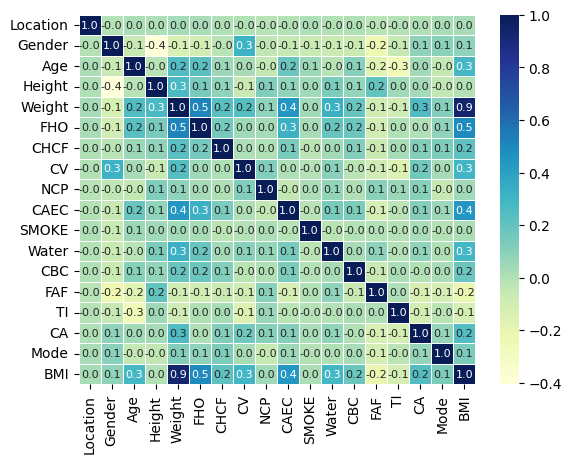

<Figure size 2400x4000 with 0 Axes>

In [401]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming te_df is your DataFrame containing the data
dataplot = sns.heatmap(te_df.drop(["Obesity_Level_encoded"],axis=1).corr(), cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5, annot_kws={"size": 8})

# Adjust the size of the heatmap
plt.figure(figsize=(24, 40))

# displaying heatmap
plt.show()

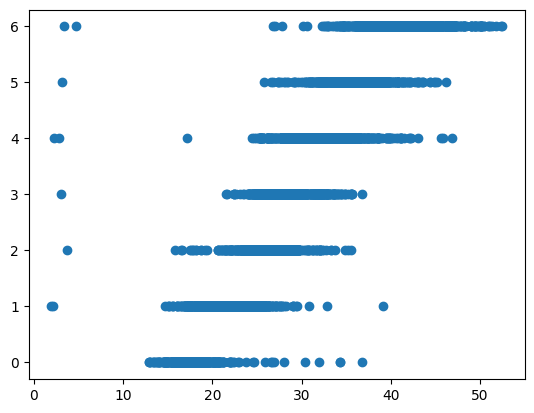

In [404]:
plt.scatter(te_df["BMI"],te_df["Obesity_Level_encoded"])
plt.show()

In [405]:
# test.drop(['Height','Weight'],axis=1,inplace=True)

In [406]:
X=te_df.drop(columns="Obesity_Level_encoded", axis=1)
Y=te_df["Obesity_Level_encoded"]

In [407]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test_df=sc.transform(test_df)

In [408]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming X and Y are your data and labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [417]:
test

,Location,Gender,Age,Height,Weight,FHO,CHCF,CV,NCP,CAEC,SMOKE,Water,CBC,FAF,TI,CA,Mode
0,Punjabi Bagh,Female,25.951979,1.669039,104.954291,1.0,1,3.000000,3.0,Sometimes,0,2.092326,0,0.043101,0.540812,Sometimes,Public_Transportation
1,Hauz Khas,Female,40.993179,1.567973,81.022119,1.0,1,2.921576,3.0,Sometimes,0,1.005727,0,1.034031,0.000000,Never,Automobile
2,Vasant Vihar,Male,21.000000,1.740000,76.000000,0.0,1,3.000000,3.0,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
3,Hauz Khas,Male,33.000000,1.680000,83.000000,1.0,1,2.000000,1.0,Sometimes,0,2.000000,0,1.000000,0.000000,Sometimes,Automobile
4,SunderNagar,Female,35.194089,1.673482,73.193589,1.0,0,3.000000,3.0,Sometimes,0,1.572371,0,1.806740,0.000000,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,Punjabi Bagh,Female,20.000000,1.600000,42.000000,0.0,1,3.000000,1.0,Frequently,0,1.000000,0,0.000000,0.000000,Sometimes,Public_Transportation
8300,Vasant Vihar,Female,21.420537,1.739457,133.735889,1.0,1,3.000000,3.0,Sometimes,0,2.310921,0,1.618512,0.711331,Sometimes,Public_Transportation
8301,Punjabi Bagh,Female,18.000000,1.600000,60.000000,0.0,1,3.000000,3.0,Always,0,2.000000,0,1.000000,0.000000,Never,Public_Transportation
8302,Vasant Vihar,Female,18.014333,1.624099,45.000000,0.0,1,3.000000,3.0,Sometimes,0,2.000000,1,1.637368,0.105936,Sometimes,Public_Transportation


In [246]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.8 MB/s eta 0:00:00


In [409]:
import optuna
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint


# Define the XGBoost Classifier
# xgb_classifier = xgb.XGBClassifier()
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [410]:
study = optuna.create_study(direction='maximize')

[I 2024-04-10 14:00:41,401] A new study created in memory with name: no-name-8c71ac83-9355-4c46-b39b-a5590edc326e


In [411]:
study.optimize(objective, n_trials=250)

<ipython-input-409-515d58c30b29>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
<ipython-input-409-515d58c30b29>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
<ipython-input-409-515d58c30b29>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
<ipython-input-409-515d58c30b29>:20: FutureWarning: suggest_loguniform has been

In [ ]:
# print('Number of finished trials: {}'.format(len(study.trials)))# our best score with trials = 300
# print('Best trial:')
# trial = study.best_trial

# print('  Value: {}'.format(trial.value))
# print('  Params: ')

# for key, value in trial.params.items():
#     print('    {}: {}'.format(key, value))

Number of finished trials: 300
Best trial:
  Value: 0.9136892814130871
  Params: 
    max_depth: 8
    learning_rate: 0.030516379182239133
    n_estimators: 387
    min_child_weight: 3
    gamma: 7.349613252017266e-07
    subsample: 0.7650994628758861
    colsample_bytree: 0.27795471462651566
    reg_alpha: 0.004885286363408767
    reg_lambda: 0.15429750343258145


In [412]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 250
Best trial:
  Value: 0.9132878362103573
  Params: 
    max_depth: 7
    learning_rate: 0.05590370306827338
    n_estimators: 445
    min_child_weight: 1
    gamma: 5.830248092313607e-05
    subsample: 0.3494967745831955
    colsample_bytree: 0.47348074119039324
    reg_alpha: 1.4154560448091802e-08
    reg_lambda: 3.987978224651359e-08


In [413]:
params = {
    'max_depth': 7,
    'learning_rate': 0.05590370306827338,
    'n_estimators': 445,
    'min_child_weight': 1,
    'gamma': 5.830248092313607e-05,
    'subsample': 0.3494967745831955,
    'colsample_bytree': 0.47348074119039324,
    'reg_alpha': 1.4154560448091802e-08,
    'reg_lambda': 3.987978224651359e-08
}

model = xgb.XGBClassifier(tree_method="hist", device="cuda", **params)
model.fit(X_train, y_train, verbose=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.47348074119039324, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5.830248092313607e-05,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05590370306827338,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=445, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [414]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9108791649939784

In [415]:
pp=model.predict(test_df)
submission=pd.DataFrame()
submission["ID"]=ID
pred=[]
for i in pp:
  key = list(w_encoding.keys())[list(w_encoding.values()).index(i)]
  pred.append(key)
submission["Obesity_Level"]=pred
submission

,ID,Obesity_Level
0,10317,Obesity_Type_III
1,4074,Obesity_Type_I
2,9060,Overweight_Level_I
3,11286,Overweight_Level_II
4,8254,Overweight_Level_I
...,...,...
8299,5294,Insufficient_Weight
8300,4473,Obesity_Type_III
8301,20603,Normal_Weight
8302,10907,Insufficient_Weight


In [416]:
submission.to_csv("pre_proc_encode_xgb_ft_sc_allobj_@150.csv",index=False)

In [ ]:
#0.910076 without scalars in xgb_ft
#0.91168 with st. scalar in xgb_ft
#0.91369 with st. scalar and col valued at 0 in xgb_ft 300

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.3 MB/s eta 0:00:00


In [ ]:
import catboost
# Define the CATBoost Classifier
def objective2(trial):
    optuna_model2 = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False,
        thread_count=-1  # Utilize all available CPU threads
    )
    optuna_model2.fit(X_train, y_train)  # Disable verbose for faster training
    y_pred = optuna_model2.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import f1_score

import catboost
# Define the CATBoost Classifier
def objective2(trial):
    optuna_model2 = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        # subsample=trial.suggest_float("subsample", 0.05, 1.0),
        colsample_bylevel=trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 1, 100),
        verbose=False,
        thread_count=-1  # Utilize all available CPU threads
    )
    optuna_model2.fit(X_train, y_train)  # Disable verbose for faster training
    y_pred = optuna_model2.predict(X_test)
    return f1_score(y_test, y_pred, average='macro')


In [ ]:
study2 = optuna.create_study(direction='maximize')

[I 2024-04-08 08:02:06,454] A new study created in memory with name: no-name-6b243e35-f3ea-48e8-ae49-6b2ac2710689


In [ ]:
study2.optimize(objective2, n_trials=100)

[I 2024-04-08 08:02:20,588] Trial 0 finished with value: 0.8477066307811756 and parameters: {'iterations': 808, 'learning_rate': 0.0017108942581984662, 'depth': 5, 'l2_leaf_reg': 3.489105850388003, 'bootstrap_type': 'Bayesian', 'random_strength': 0.00016996560076388138, 'bagging_temperature': 3.0127073799443216, 'od_type': 'IncToDec', 'od_wait': 34, 'colsample_bylevel': 0.7266465784552409, 'min_data_in_leaf': 12}. Best is trial 0 with value: 0.8477066307811756.
[I 2024-04-08 08:04:18,135] Trial 1 finished with value: 0.8805202331145792 and parameters: {'iterations': 731, 'learning_rate': 0.06978511180471479, 'depth': 10, 'l2_leaf_reg': 2.258120194160757e-05, 'bootstrap_type': 'Bayesian', 'random_strength': 5.342830043615411e-07, 'bagging_temperature': 4.026708165176943, 'od_type': 'Iter', 'od_wait': 30, 'colsample_bylevel': 0.6449092942354956, 'min_data_in_leaf': 62}. Best is trial 1 with value: 0.8805202331145792.
[I 2024-04-08 08:04:25,992] Trial 2 finished with value: 0.874076186868

In [ ]:
print('Number of finished trials: {}'.format(len(study2.trials)))
print('Best trial:')
trial2 = study2.best_trial

print('  Value: {}'.format(trial2.value))
print('  Params: ')

for key, value in trial2.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9013311461379472
  Params: 
    iterations: 856
    learning_rate: 0.09830302266863758
    depth: 4
    l2_leaf_reg: 0.0826917107549908
    bootstrap_type: Bayesian
    random_strength: 7.041557413245553e-08
    bagging_temperature: 0.07512853115195768
    od_type: Iter
    od_wait: 31
    colsample_bylevel: 0.871341223123925
    min_data_in_leaf: 15


In [ ]:
#0.91048 catboost_ft

In [ ]:
model = catboost.CatBoostClassifier(**trial2.params, verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       301
           1       0.88      0.89      0.88       369
           2       0.83      0.76      0.80       301
           3       0.81      0.86      0.83       308
           4       0.92      0.88      0.90       346
           5       0.97      0.98      0.98       387
           6       0.99      0.99      0.99       479

    accuracy                           0.91      2491
   macro avg       0.90      0.90      0.90      2491
weighted avg       0.91      0.91      0.91      2491



In [ ]:
accuracy_score(y_test,y_pred)

0.9100762745885187

In [ ]:
pp=model.predict(test_df)
submission=pd.DataFrame()
submission["ID"]=ID
pred=[]
for i in pp:
  key = list(w_encoding.keys())[list(w_encoding.values()).index(i)]
  pred.append(key)
submission["Obesity_Level"]=pred
submission

,ID,Obesity_Level
0,10317,Obesity_Type_III
1,4074,Obesity_Type_I
2,9060,Overweight_Level_I
3,11286,Overweight_Level_II
4,8254,Overweight_Level_I
...,...,...
8299,5294,Insufficient_Weight
8300,4473,Obesity_Type_III
8301,20603,Normal_Weight
8302,10907,Insufficient_Weight


In [ ]:
submission.to_csv("pre_proc_encode_catb_ft_sc.csv",index=False)